# Export latex for ysprod models

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Import needed packages from positive
from positive import *
# Import other usefuls
from os.path import expanduser
from kerr import *
import pickle
from numpy import *
from scipy.io import loadmat
# Import ysprod models
with open('./ysmodels.pickle','rb') as f:
    ysfits = pickle.load(f)
#
from matplotlib.pyplot import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(positive)>> Applying custom matplotlib settings.


## Misc

In [3]:

z = sorted(ysfits.keys(),key= lambda X: X[0])

f = open('/Users/book/KOALA/positive_dev/docs/mvfits_paper/src/ysprod_eqns.tex','wb')
f.write('\\begin{align}\n')
for k in z:
    y = ysfits[k]
    #print '\n'
    #print k
    #print y
    f.write('   %% %s\n'%str(k))
    f.write('  \\label{eq:ys%i%i%i%i%i}\n'%k)
    f.write('  '+y.__str_latex__(precision=5,labels=[r'\sigma_{%i%i%i%i%i}'%k,[r'\kappa'],'']).replace(r'\;',r'\,').replace('e+0','\\times 10^'))
    f.write('   \\\\\n')
f.write('\\end{align}\n')
f.close()

## Plots

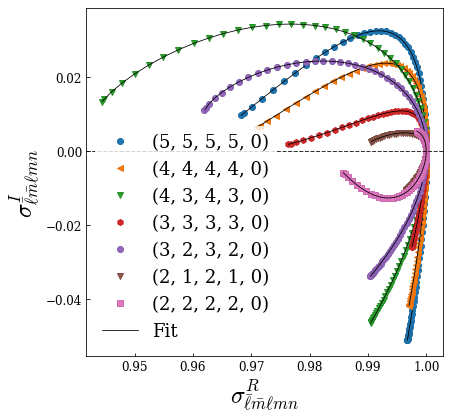

In [155]:

#
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = mpl.rcParams['xtick.labelsize']

#
z = sorted(ysfits.keys(),key= lambda X: X[0])[::-1]
# z = [(3, 2, 2, 2, 0), (4, 3, 3, 3, 0)]
Q = 81
jf = 0.995*cos(pi*linspace(0,1,Q)) 


#
fig = figure( figsize=1.6*figaspect(1) )
mkr = 'o<vs*h>^o<vs*h>p*'

#
lbool = False
for i,k in enumerate(z):
    y = ysfits[k]
    ll,mm,l,m,n = k
    if (n==0) and (l==ll):
        p = plot( y.scalar_range.real,y.scalar_range.imag, ls='none', marker=mkr[i], label=k )
        p0 = p[0]
        p0.set_markeredgecolor( 0.9*array([int(p[0].get_color().lstrip('#')[i:i+2], 16) for i in (0, 2 ,4)])/255 )
        if k is z[-1]:
            label = 'Fit'
            lbool = True
        else:
            label = None
        plot( y.eval(y.domain).real,y.eval(y.domain).imag, color='k', label=label )
    
#
xlabel(r'$\sigma^{R}_{ \bar{\ell} \bar{m} \ell m n}$')
ylabel(r'$\sigma^{I}_{ \bar{\ell} \bar{m} \ell m n}$')
legend()
    
#
gca().tick_params(direction='in')

#
axhline(0,color='k',ls='--')

#
# xlim( [-1,1] )
legend(frameon=True,edgecolor='none')

#
savefig('/Users/book/KOALA/positive_dev/docs/mvfits_paper/fig/issue2_ysprod_1.pdf',pad_inches=0, bbox_inches='tight')

In [45]:

# def _ysprod14081860(j,ll,mm,lmn):
#     tbl = loadtxt('/Users/book/Desktop/swsh_fits.dat')
#     print tbl.shape
#     MM,LL,L,N,P1,P2,P3,P4,Q1,Q2,Q3,Q4,_,_,_,_ = tbl.T
#     l,m,n = lmn
#     k = (ll==LL) & (mm==MM) & (l==L) & (n==N)
#     if sum(k)!=1: 
#         error('cannot find fit from Berti+ for (L,M,l,m,n) = (%i,%i,%i,%i,%)'%(L,M,l,m,n))
#     j_ = abs(j)
#     ans = (1 if ll==l else 0) + P1[k]*j_**P2[k] + P3[k]*j_**P4[k] + 1j * ( Q1[k]*j_**Q2[k] + Q3[k]*j_**Q4[k] )
#     return ans
        


In [33]:
print MM

[ 2.  2.  2. ..., -7. -7. -7.]


(2320, 16)


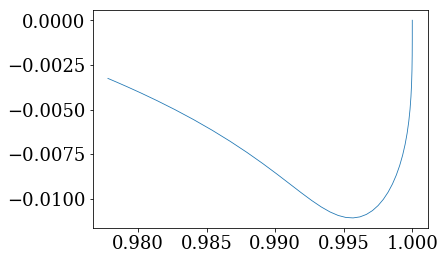

In [37]:
ll,mm,l,m,n = 3,3,3,2,0
pos_jf = jf[ jf>0 ]
_sigma = _ysprod14081860(pos_jf,ll,mm,(l,m,n))
plot( _sigma.real, _sigma.imag )

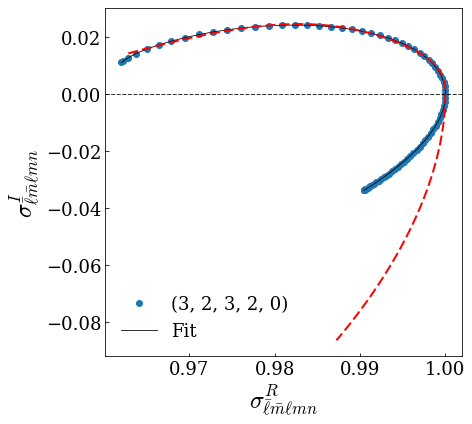

In [45]:
#
# z = sorted(ysfits.keys(),key= lambda X: X[0])
z = [(3, 2, 3, 2, 0)]
# z = [(3, 2, 2, 2, 0), (4, 3, 3, 3, 0)]
Q = 81
jf = 0.995*cos(pi*linspace(0,1,Q)) 


#
fig = figure( figsize=1.6*figaspect(1) )
mkr = 'ov'

#
for i,k in enumerate(z):
    y = ysfits[k]
    ll,mm,l,m,n = k
    p = plot( y.scalar_range.real,y.scalar_range.imag, ls='none', marker=mkr[i], label=k )
    if k is z[-1]:
        label = 'Fit'
        lbool = True
    else:
        label = None
    plot( y.eval(y.domain).real,y.eval(y.domain).imag, color='k', label=label )
    bert_fit = ysprod14081860(jf,ll,mm,(l,m,n))
    plot( bert_fit.real, bert_fit.imag, '--r', lw=2 )
    
    
#
gca().tick_params(direction='in')

#
axhline(0,color='k',ls='--')

#
xlabel(r'$\sigma^{R}_{ \bar{\ell} \bar{m} \ell m n}$')
ylabel(r'$\sigma^{I}_{ \bar{\ell} \bar{m} \ell m n}$')
legend()

#
# savefig('/Users/book/KOALA/positive_dev/docs/mvfits_paper/fig/issue2_ysprod_2.pdf',pad_inches=0, bbox_inches='tight')


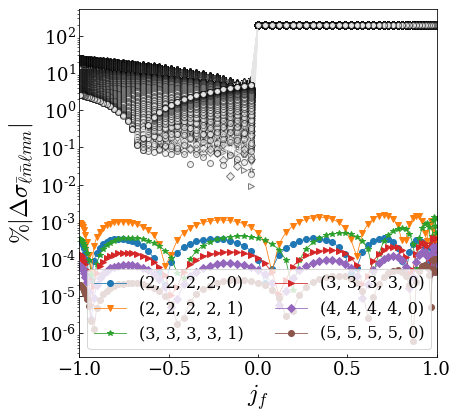

In [29]:
#
z = sorted(ysfits.keys(),key= lambda X: X[0])
# z = [(3, 2, 2, 2, 0), (4, 3, 3, 3, 0)]
Q = 81
jf = 0.995*cos(pi*linspace(0,1,Q)) 


#
fig = figure( figsize=1.6*figaspect(1) )
mkr = 'o<vs*h>^pXDo<vs*h>p*'

__y = {}
__res = {}

#
for i,k in enumerate(z):
    
    ll,mm,l,m,n = k
        
    if ll==mm:# and not ( k == (2,2,2,2,1) ):
#     if not ( k in [(3, 2, 2, 2, 0), (4, 3, 3, 3, 0)] ) :

        y = ysfits[k]
        #print lim(y.domain)
        #_y = array([ ysprod( j, ll, mm, (l,m,n) ) for j in jf ])
        #__y[k] = _y
        
        # --------------------------------------------------------- #
        # Berti
        y_fit = ysprod14081860( jf, ll,mm, (l,m,n) )
        res2 = 100*abs(y.scalar_range-y_fit)/abs(mean(y.scalar_range))
        # --------------------------------------------------------- #
        
        
        res = 100*abs(y.scalar_range-y.eval(y.domain))/abs(mean(y.scalar_range))
        p = plot( jf,res, ls='-', marker=mkr[i], label=k )
        
        mask = jf>-100 # 0.005
        p2 = plot( jf[mask],res2[mask], ls='-', marker=mkr[i], label=None, color=0.9*ones(3), alpha = 0.5, mec='k' )
        #if k is z[-1]:
        #    label = 'Fit'
        #    lbool = True
        #else:
        #    label = None
        #plot( y.eval(y.domain).real,y.eval(y.domain).imag, color='k', label=label )

    
#
gca().tick_params(direction='in')

#
axhline(0,color='k',ls='--')
xlim( [-1,1] )
# ylim( [1e-7,1e-1] )

#
xlabel(r'$j_f$')
ylabel(r'$\%|\Delta\sigma_{ \bar{\ell} \bar{m} \ell m n}|$')
legend(ncol=2,fontsize=16,frameon=True)
yscale('log')

#
# savefig('/Users/book/KOALA/positive_dev/docs/mvfits_paper/issue2_ysprod_3v2.pdf',pad_inches=0, bbox_inches='tight')


In [38]:
# #
# z = sorted(ysfits.keys(),key= lambda X: X[0])
# # z = [(3, 2, 2, 2, 0), (4, 3, 3, 3, 0)]
# Q = 81
# jf = 0.995*cos(pi*linspace(0,1,Q)) 


# #
# # fig = figure( figsize=1.6*figaspect(1) )
# mkr = 'o<vs*h>^o<vs*h>p*'

# __y = {}
# __res = {}

# #
# for i,k in enumerate(z):
    
#     ll,mm,l,m,n = k
        
#     if ll==mm:# and not ( k == (2,2,2,2,1) ):
# #     if not ( k in [(3, 2, 2, 2, 0), (4, 3, 3, 3, 0)] ) :

#         y = ysfits[k]
#         #print lim(y.domain)
#         #_y = array([ ysprod( j, ll, mm, (l,m,n) ) for j in jf ])
#         #__y[k] = _y
        
#         #y_fit = y.eval(y.domain)
#         y_fit = ysprod14081860( jf, ll,mm, (l,m,n) ).conj()
#         res = 100*abs(y.scalar_range-y_fit)/abs(mean(y.scalar_range))
        
#         #res = 100*(y.scalar_range.real-y.eval(y.domain).real)/abs(mean(y.scalar_range))
#         #__res[k] = 100*res/abs(max(y.scalar_range.real))
#         figure()
#         p = plot( y_fit.real, y_fit.imag, ls='-', label='berti' )
#         p = plot( y.scalar_range.real, y.scalar_range.imag, ls='--', label='numerical' )
#         title(k)
#         legend()
# #         p = plot( jf,res, ls='-', marker=mkr[i], label=k )
#         #if k is z[-1]:
#         #    label = 'Fit'
#         #    lbool = True
#         #else:
#         #    label = None
#         #plot( y.eval(y.domain).real,y.eval(y.domain).imag, color='k', label=label )

    
# # #
# # gca().tick_params(direction='in')

# # #
# # axhline(0,color='k',ls='--')
# # xlim( [0.05,1] )
# # # ylim( [1e-2,1e1] )

# # #
# # xlabel(r'$j_f$')
# # ylabel(r'$\%|\Delta\sigma_{ \bar{\ell} \bar{m} \ell m n}|$')
# # legend(ncol=2,fontsize=16,frameon=True)
# # yscale('log')

# #
# # savefig('/Users/book/KOALA/positive_dev/docs/mvfits_paper/fig/issue2_ysprod_3_berti.pdf',pad_inches=0, bbox_inches='tight')


In [39]:
# #
# z = sorted(ysfits.keys(),key= lambda X: X[0])
# # z = [(3, 2, 2, 2, 0), (4, 3, 3, 3, 0)]
# Q = 81
# jf = 0.995*cos(pi*linspace(0,1,Q)) 


# #
# fig = figure( figsize=1.6*figaspect(1) )
# mkr = 'o<vs*h>^o<vs*h>p*'

# __y = {}
# __res = {}

# #
# for i,k in enumerate(z):
    
#     ll,mm,l,m,n = k
        
#     if ll==mm:# and not ( k == (2,2,2,2,1) ):
# #     if not ( k in [(3, 2, 2, 2, 0), (4, 3, 3, 3, 0)] ) :

#         y = ysfits[k]
#         #print lim(y.domain)
#         #_y = array([ ysprod( j, ll, mm, (l,m,n) ) for j in jf ])
#         #__y[k] = _y
        
#         #y_fit = y.eval(y.domain)
#         y_fit = ysprod14081860( jf, ll,mm, (l,m,n) ).conj()
#         res = 100*abs(y.scalar_range-y_fit)/abs(mean(y.scalar_range))
        
#         #res = 100*(y.scalar_range.real-y.eval(y.domain).real)/abs(mean(y.scalar_range))
#         #__res[k] = 100*res/abs(max(y.scalar_range.real))
#         #p = plot( res.real, res.imag, ls='-', marker=mkr[i], label=k )
#         p = plot( jf,res, ls='-', marker=mkr[i], label=k )
#         #if k is z[-1]:
#         #    label = 'Fit'
#         #    lbool = True
#         #else:
#         #    label = None
#         #plot( y.eval(y.domain).real,y.eval(y.domain).imag, color='k', label=label )

    
# #
# gca().tick_params(direction='in')

# #
# axhline(0,color='k',ls='--')
# xlim( [0.03,1] )
# # ylim( [1e-2,1e1] )

# #
# xlabel(r'$j_f$')
# ylabel(r'$\%|\Delta\sigma_{ \bar{\ell} \bar{m} \ell m n}|$')
# legend(ncol=2,fontsize=16,frameon=True)
# yscale('log')

# #
# # savefig('/Users/book/KOALA/positive_dev/docs/mvfits_paper/fig/issue2_ysprod_3_berti.pdf',pad_inches=0, bbox_inches='tight')


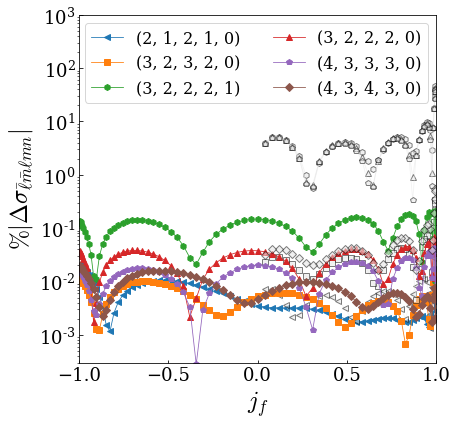

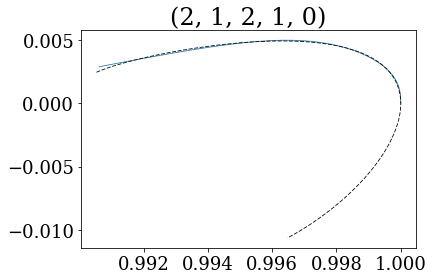

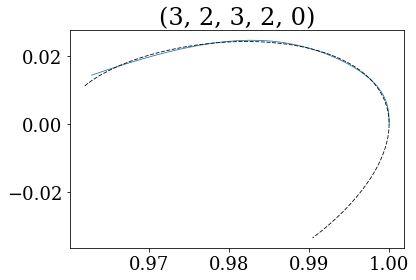

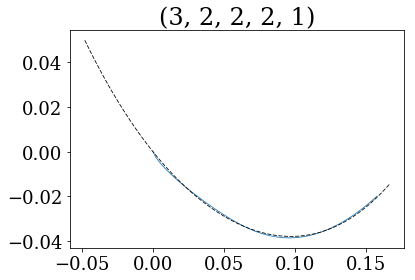

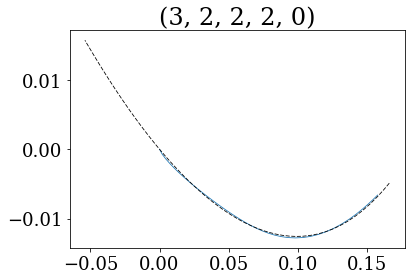

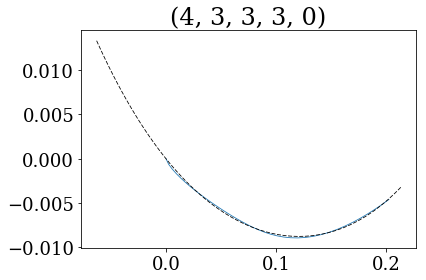

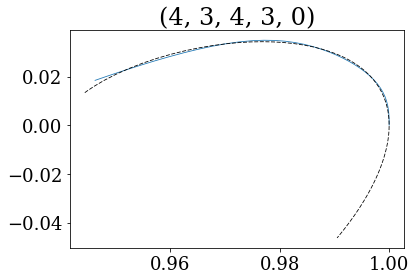

In [67]:
#
z = sorted(ysfits.keys(),key= lambda X: X[0])
# z = [(3, 2, 2, 2, 0), (4, 3, 3, 3, 0)]
Q = 81
jf = 0.995*cos(pi*linspace(0,1,Q)) 


#
fig = figure( figsize=1.6*figaspect(1) )
mkr = 'o<vs*h>^pDXo<vs*h>p*'
ax = gca()

__y = {}
__res = {}

#
for i,k in enumerate(z):
    
    ll,mm,l,m,n = k
        
    if ll!=mm:
#     if not ( k in [(3, 2, 2, 2, 0), (4, 3, 3, 3, 0)] ) :

        y = ysfits[k]
        #print lim(y.domain)
        #_y = array([ ysprod( j, ll, mm, (l,m,n) ) for j in jf ])
        #__y[k] = _y
        res = 100*abs(y.scalar_range-y.eval(y.domain))/abs(mean(y.scalar_range))
        
        
        
        # --------------------------------------------------------- #
        # Berti
        y_fit = -ysprod14081860( jf, ll,mm, (l,m,n) ).conj()
        if mod(l+m,2):
            y_fit = -y_fit
        res2 = 100*abs(y.scalar_range-y_fit)/abs(mean(y.scalar_range))
        # --------------------------------------------------------- #
        
        figure()
        plot( y_fit.real, y_fit.imag )
        plot( y.scalar_range.real, y.scalar_range.imag, '--k' )
        title(k)
        
        
        
        sca(ax)
        p = plot( jf,res, ls='-', marker=mkr[i], label=k )
        mask = jf>0.005
        p2 = plot( jf[mask],res2[mask], ls='-', marker=mkr[i], label=None, color=0.9*ones(3), alpha = 0.5, mec='k' )
        #if k is z[-1]:
        #    label = 'Fit'
        #    lbool = True
        #else:
        #    label = None
        #plot( y.eval(y.domain).real,y.eval(y.domain).imag, color='k', label=label )

    
#
gca().tick_params(direction='in')

#
axhline(0,color='k',ls='--')
xlim( [-1,1] )
ylim( [3e-4,1e3] )

#
xlabel(r'$j_f$')
ylabel(r'$\%|\Delta\sigma_{ \bar{\ell} \bar{m} \ell m n}|$')
legend(ncol=2,fontsize=16,frameon=True)
yscale('log')

#
savefig('/Users/book/KOALA/positive_dev/docs/mvfits_paper/issue2_ysprod_4v2.pdf',pad_inches=0, bbox_inches='tight')


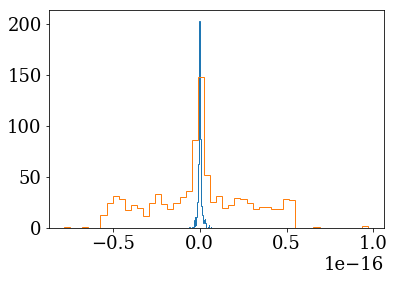

In [34]:
a = []
b = []
for k in __res:
    a += list( __res[k].imag )
    b += list( __res[k].real )
hist(a,50,histtype='step');
hist(b,50,histtype='step');

In [49]:
ll,mm,l,m,n = 3,2,2,2,0
jf = 0.68
beta = 1.0 / ( 2 + ll-abs(mm) )
kappa = lambda JF: (log( 2 - JF ) / log(3))**(beta)
a = ysfits[ll,mm,l,m,n].eval(array([kappa(jf)]))[0]
b = ysprod(jf,ll,mm,(l,m,n))
print a
print b
print (abs(a-b))

(0.0670185386343-0.0111024108534j)
(0.0670158274683-0.0111007365255j)
3.1865019782e-06


In [42]:
print jf


[  9.95000000e-01   9.94232891e-01   9.91932747e-01   9.88103115e-01
   9.82749899e-01   9.75881354e-01   9.67508071e-01   9.57642960e-01
   9.46301234e-01   9.33500379e-01   9.19260135e-01   9.03602458e-01
   8.86551492e-01   8.68133527e-01   8.48376964e-01   8.27312264e-01
   8.04971909e-01   7.81390346e-01   7.56603936e-01   7.30650897e-01
   7.03571247e-01   6.75406742e-01   6.46200808e-01   6.15998480e-01
   5.84846326e-01   5.52792382e-01   5.19886072e-01   4.86178135e-01
   4.51720547e-01   4.16566439e-01   3.80770015e-01   3.44386472e-01
   3.07471909e-01   2.70083248e-01   2.32278137e-01   1.94114870e-01
   1.55652293e-01   1.16949710e-01   7.80668002e-02   3.90635167e-02
   6.09261783e-17  -3.90635167e-02  -7.80668002e-02  -1.16949710e-01
  -1.55652293e-01  -1.94114870e-01  -2.32278137e-01  -2.70083248e-01
  -3.07471909e-01  -3.44386472e-01  -3.80770015e-01  -4.16566439e-01
  -4.51720547e-01  -4.86178135e-01  -5.19886072e-01  -5.52792382e-01
  -5.84846326e-01  -6.15998480e-01

In [4]:


#
z = sorted(ysfits.keys(),key= lambda X: X[0])

for k in z:
    #
    L,M,l,m,n = z
    #
    




[(2, 2, 2, 2, 0), (2, 1, 2, 1, 0), (2, 2, 2, 2, 1), (3, 2, 3, 2, 0), (3, 3, 3, 3, 1), (3, 2, 2, 2, 1), (3, 3, 3, 3, 0), (3, 2, 2, 2, 0), (4, 3, 3, 3, 0), (4, 3, 4, 3, 0), (4, 4, 4, 4, 0), (5, 5, 5, 5, 0)]
